In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import sklearn

In [56]:
# Load dataset
df = pd.read_csv("california_housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price_above_median
0,2.1827,26.0,4.521429,0.921429,305.0,2.178571,40.05,-122.10,0
1,3.0755,32.0,4.623068,0.983353,3868.0,4.599287,32.77,-117.06,0
2,1.8235,40.0,4.701149,1.126437,928.0,3.555556,37.75,-122.16,0
3,1.4625,37.0,4.247845,1.105603,1673.0,3.605603,33.99,-118.28,0
4,1.9063,13.0,3.453125,0.984375,286.0,4.468750,33.97,-118.16,0


In [57]:
# Shape and size of raw data
print("Shape of dataset:", df.shape)
print("Size of dataset:", df.size)

Shape of dataset: (20634, 9)
Size of dataset: 185706


In [58]:
print("\nData Types:")
print(df.dtypes)


Data Types:
MedInc                float64
HouseAge              float64
AveRooms              float64
AveBedrms             float64
Population            float64
AveOccup              float64
Latitude              float64
Longitude             float64
price_above_median      int64
dtype: object


In [59]:
# Check for duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")


Number of duplicate rows: 0


In [60]:
# Statistical summary
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20634.000000  20634.000000  20634.000000  20634.000000  20634.000000   
mean       3.870795     28.640399      5.429171      1.096628   1425.398081   
std        1.899796     12.584629      2.474393      0.473929   1132.137403   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563925     18.000000      4.440930      1.006067    787.000000   
50%        3.534950     29.000000      5.229190      1.048780   1166.000000   
75%        4.743550     37.000000      6.052381      1.099499   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  price_above_median  
count  20634.000000  20634.000000  20634.000000        20634.000000  
mean       3.070449     35.631722   -119.569594            0.500000  
std       10.387501      2.135738      2.003457         

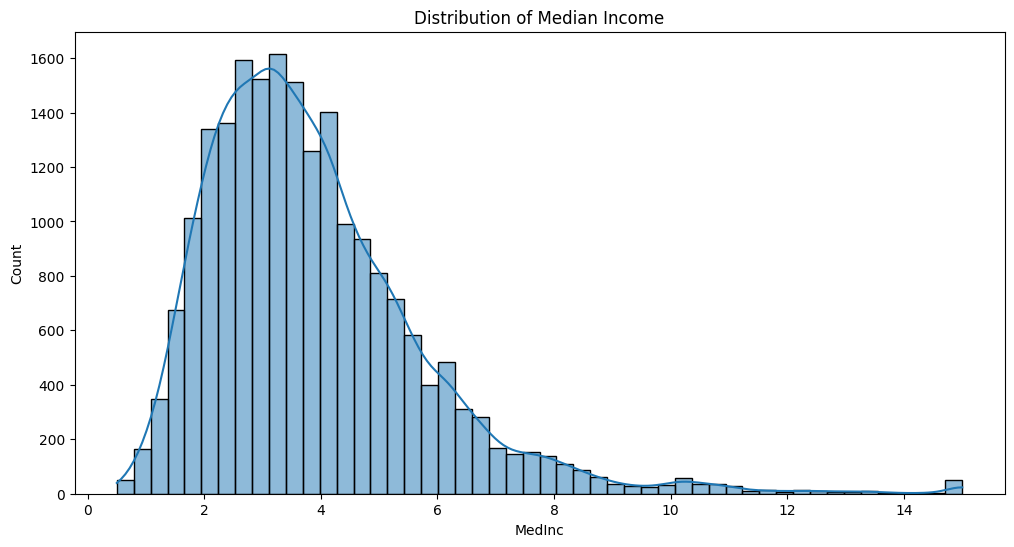

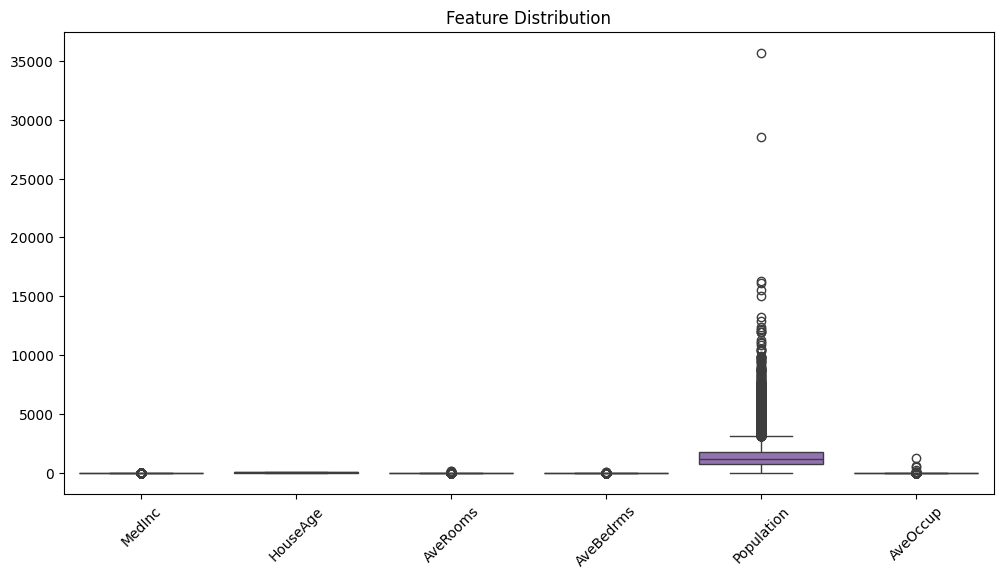

In [61]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(df['MedInc'], bins=50, kde=True)
plt.title("Distribution of Median Income")
plt.show()

# Univariate Boxplot Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']])
plt.xticks(rotation=45)
plt.title("Feature Distribution")
plt.show()

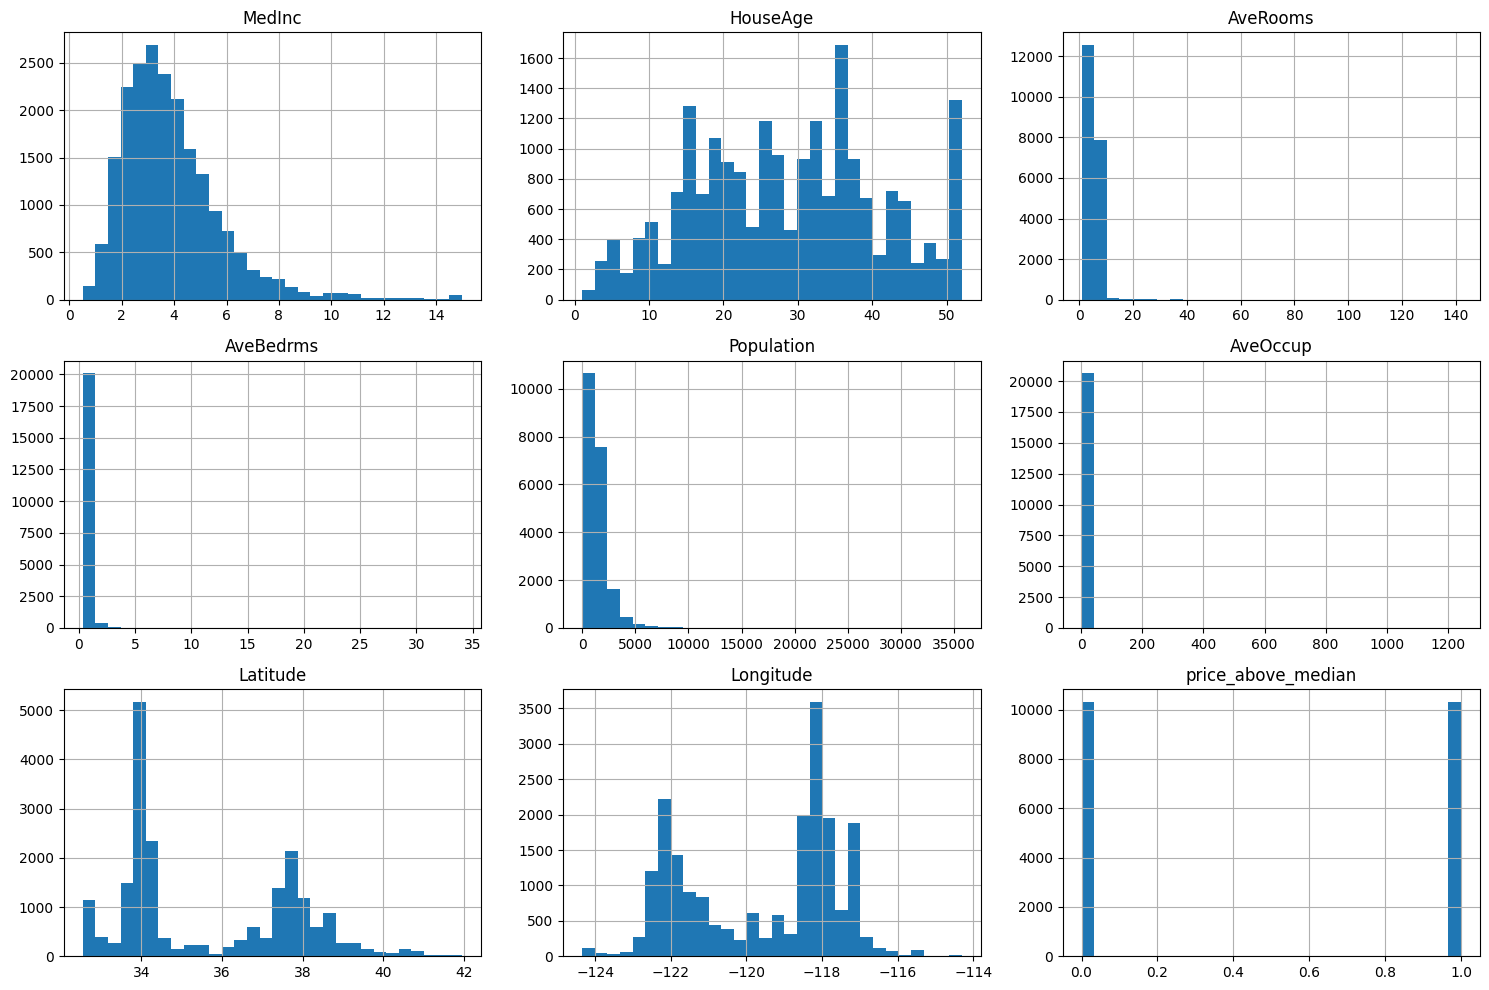

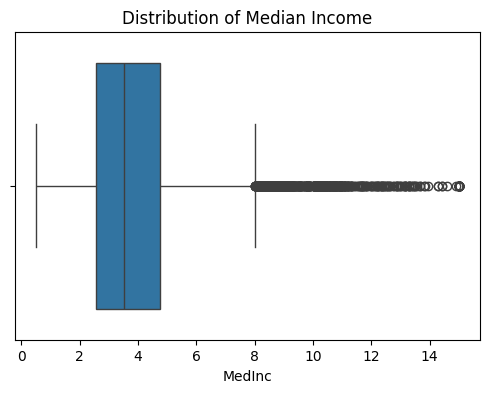

In [62]:
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['MedInc'])
plt.title('Distribution of Median Income')
plt.show()

In [63]:
# Splitting data into features and target variable
X = df.drop(columns=['price_above_median'])
y = df['price_above_median']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

----- K-Nearest Neighbors -----
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3095
           1       0.83      0.84      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191



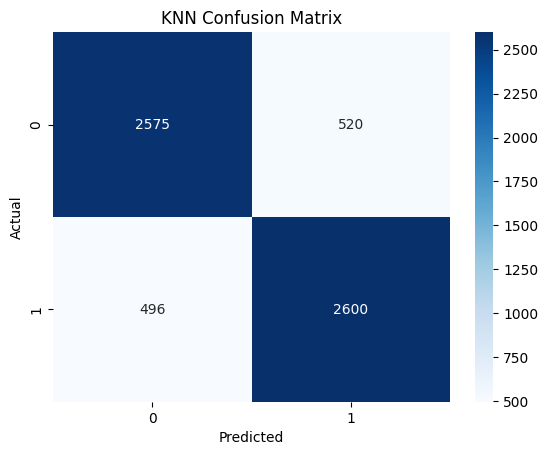

In [68]:
param_grid = {'n_neighbors': range(1, 21)}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train_scaled, y_train)

best_knn = grid_knn.best_estimator_

print("----- K-Nearest Neighbors -----")
y_pred_knn = best_knn.predict(X_test_scaled)
print("Classification Report for KNN:")
print(classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

----- Decision Tree -----
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      3095
           1       0.83      0.85      0.84      3096

    accuracy                           0.84      6191
   macro avg       0.84      0.84      0.84      6191
weighted avg       0.84      0.84      0.84      6191



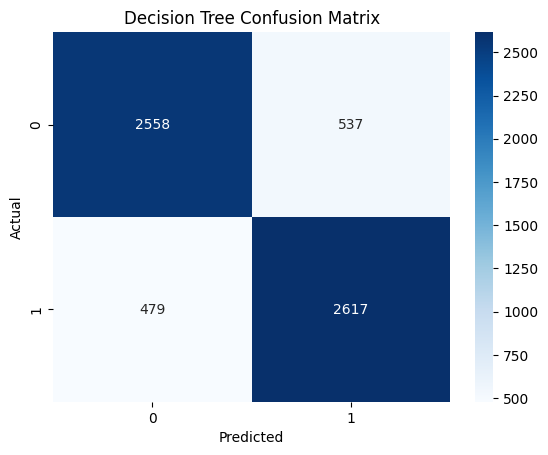

In [66]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

print("----- Decision Tree -----")
y_pred_dt = dt.predict(X_test)
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

----- Random Forest -----
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      3095
           1       0.89      0.90      0.90      3096

    accuracy                           0.90      6191
   macro avg       0.90      0.90      0.90      6191
weighted avg       0.90      0.90      0.90      6191



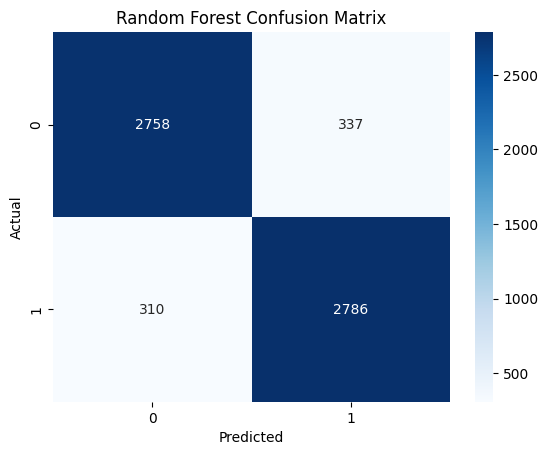

In [67]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("----- Random Forest -----")
y_pred_rf = rf.predict(X_test)
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

----- AdaBoost -----
Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2064
           1       0.85      0.87      0.86      2063

    accuracy                           0.86      4127
   macro avg       0.86      0.86      0.86      4127
weighted avg       0.86      0.86      0.86      4127



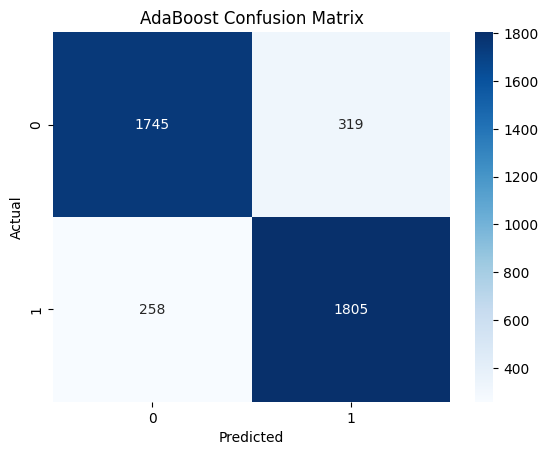

In [54]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

print("----- AdaBoost -----")
y_pred_ada = ada.predict(X_test)
print("Classification Report for AdaBoost:")
print(classification_report(y_test, y_pred_ada))
cm_ada = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues')
plt.title('AdaBoost Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()